In [1]:
# Import necesssary lib
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(rc=('figure.figsize':(8,6)))
#import missingno as msno

import datetime
import warnings
import itertools
import graphviz
import pydotplus

%matplotlib inline

from scipy.stats import zscore as zcore
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

# EXPLORATORY DATA ANALYSIS

In [2]:
# Load Data
client = pd.read_csv("client_data (1).csv")
price = pd.read_csv("price_data (1).csv")

In [3]:
client.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
client['channel_sales'].unique()

array(['foosdfpfkusacimwkcsosbicdxkicaua', 'MISSING',
       'lmkebamcaaclubfxadlmueccxoimlema',
       'usilxuppasemubllopkaafesmlibmsdf',
       'ewpakwlliwisiwduibdlfmalxowmwpci',
       'epumfxlbckeskwekxbiuasklxalciiuu',
       'sddiedcslfslkckwlfkdpoeeailfpeds',
       'fixdbufsefwooaasfcxdxadsiekoceaa'], dtype=object)

In [5]:
client['channel_sales']=client['channel_sales'].map({'foosdfpfkusacimwkcsosbicdxkicaua':'CH1','lmkebamcaaclubfxadlmueccxoimlema':'CH2','usilxuppasemubllopkaafesmlibmsdf':'CH3',
                            'ewpakwlliwisiwduibdlfmalxowmwpci':'CH4','epumfxlbckeskwekxbiuasklxalciiuu':'CH5','sddiedcslfslkckwlfkdpoeeailfpeds':'CH6',
                                                    'fixdbufsefwooaasfcxdxadsiekoceaa':'CH7', 'MISSING':'NAN'})

In [6]:
client['origin_up'].unique()

array(['lxidpiddsbxsbosboudacockeimpuepw',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'ldkssxwpmemidmecebumciepifcamkci', 'MISSING',
       'usapbepcfoloekilkwsdiboslwaxobdp',
       'ewxeelcelemmiwuafmddpobolfuxioce'], dtype=object)

In [7]:
client['origin_up'] = client['origin_up'].map({'lxidpiddsbxsbosboudacockeimpuepw':'CAMP1','kamkkxfxxuwbdslkwifmmcsiusiuosws':'CAMP2','ldkssxwpmemidmecebumciepifcamkci':'CAMP3',
                                              'usapbepcfoloekilkwsdiboslwaxobdp':'CAMP4','ewxeelcelemmiwuafmddpobolfuxioce':'CAMP5','MISSING':'NAN'})

In [8]:
client['has_gas']=client['has_gas'].map({'t':1,'f':0})

In [9]:
client['churn'] = client['churn'].replace({0:'stayed',1:'churned'})

In [10]:
client.shape

(14606, 26)

In [11]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [12]:
# Checking for number of unique values in each columns 

for column in client:
    unique_vals = np.unique(client[column])
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of unique values in column {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of unique values in column {} :{}'.format(column, nr_values))

The number of unique values in column id :14606
The number of unique values in column channel_sales :8 -- ['CH1' 'CH2' 'CH3' 'CH4' 'CH5' 'CH6' 'CH7' 'NAN']
The number of unique values in column cons_12m :11065
The number of unique values in column cons_gas_12m :2112
The number of unique values in column cons_last_month :4751
The number of unique values in column date_activ :1796
The number of unique values in column date_end :368
The number of unique values in column date_modif_prod :2129
The number of unique values in column date_renewal :386
The number of unique values in column forecast_cons_12m :13993
The number of unique values in column forecast_cons_year :4218
The number of unique values in column forecast_discount_energy :12
The number of unique values in column forecast_meter_rent_12m :3528
The number of unique values in column forecast_price_energy_off_peak :516
The number of unique values in column forecast_price_energy_peak :329
The number of unique values in column forecas

In [13]:
# Missing Values
client.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [14]:
#Number Of churned customers in the last 3 months
churn_count = client['churn'].value_counts()
print('Total Number of Churned Customers:\n', churn_count)

Total Number of Churned Customers:
 stayed     13187
churned     1419
Name: churn, dtype: int64


In [15]:
churn_rate = churn_count/client.shape[0]*100
print('churn_rate: \n', churn_rate)

churn_rate: 
 stayed     90.284814
churned     9.715186
Name: churn, dtype: float64


In [16]:
# Group by channelsales
G1= client.groupby(['channel_sales','churn']).size().reset_index().rename(columns={0:'number_of_churn'})
G1

,channel_sales,churn,number_of_churn
0,CH1,churned,820
1,CH1,stayed,5934
2,CH2,churned,103
3,CH2,stayed,1740
4,CH3,churned,138
5,CH3,stayed,1237
6,CH4,churned,75
7,CH4,stayed,818
8,CH5,stayed,3
9,CH6,stayed,11


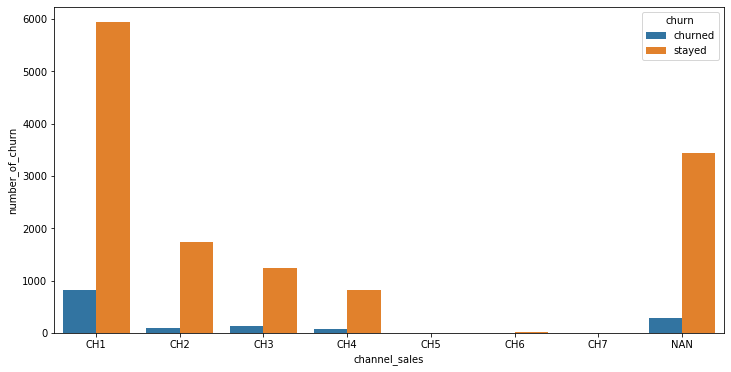

In [17]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='channel_sales', y='number_of_churn', hue='churn', data =G1)

In [18]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [19]:
# Changing date format from object to datatime
client["date_activ"] = pd.to_datetime(client["date_activ"], format='%Y-%m-%d')
client["date_end"] = pd.to_datetime(client["date_end"], format='%Y-%m-%d')
client["date_modif_prod"] = pd.to_datetime(client["date_modif_prod"], format='%Y-%m-%d')
client["date_renewal"] = pd.to_datetime(client["date_renewal"], format='%Y-%m-%d')

In [20]:
# Checking datatype
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [21]:
client.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,0.181501,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,0.385446,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,0.000000,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,0.000000,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,1.000000,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000


def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

churn = client[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

In [22]:
#client2 = client.copy()

In [23]:
#client2.columns

In [24]:
#client3=client2.drop(['date_activ','date_end','date_modif_prod','date_renewal','origin_up'],axis=1)

In [25]:
#client3.head()

C:\Users\VICTOR ONYEAGHALA\anaconda3.0\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


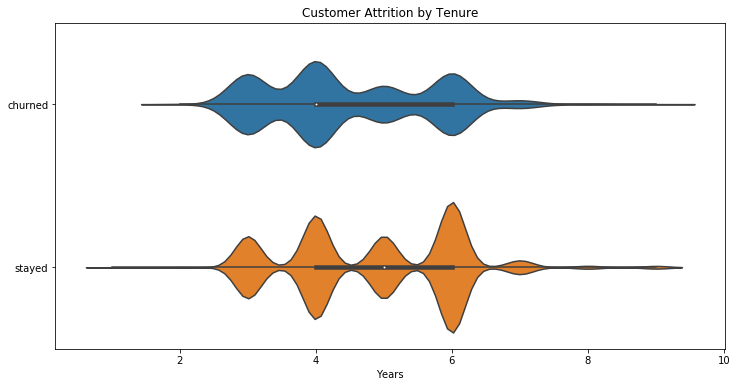

In [26]:
# Calculate the zcores of tenure
tenure_zcores = zcore(a=client['num_years_antig'])
# Convert to absolute values
abs_tenure_zscores = np.abs(tenure_zcores)
# Extract Columns of interest
churn_tenure = client[['churn','num_years_antig']]
# Add z-score column
churn_tenure['z_score'] = list(abs_tenure_zscores)
# Remove outliers 
churned_tenure_filtered = churn_tenure[churn_tenure['z_score'] < 3]
# Visualize tenure by retained customer and churner
vio = sns.violinplot( y=churned_tenure_filtered["churn"], x=churned_tenure_filtered['num_years_antig'], data = client)
# Settings
vio.set(xlabel='Years' ,ylabel='')
vio.set_title("Customer Attrition by Tenure")
plt.show()

In [27]:
price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [28]:
price.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [29]:
price.shape

(193002, 8)

In [30]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [31]:
price["price_date"] = pd.to_datetime(price["price_date"], format='%Y-%m-%d')

In [32]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [33]:
price.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [34]:
data_merge = pd.merge(client, price, how='left', on='id')
data_merge.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,CAMP1,43.648,churned,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,CAMP1,43.648,churned,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,CAMP1,43.648,churned,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,CAMP1,43.648,churned,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,CAMP1,43.648,churned,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [35]:
data_merge.groupby('channel_sales').size().reset_index()

,channel_sales,0
0,CH1,80971
1,CH2,22105
2,CH3,16486
3,CH4,10712
4,CH5,36
5,CH6,131
6,CH7,24
7,NAN,44684


In [36]:
data_merge['channel_sales'] = data_merge['channel_sales'].replace({'Nan':'N/A'})
data_merge.groupby('channel_sales')['net_margin'].agg('sum').sort_values(ascending =False)

channel_sales
CH1    16122804.88
NAN     7597433.83
CH2     5272559.31
CH3     2367699.42
CH4     1748254.47
CH6       24906.89
CH5        6779.28
CH7        5687.76
Name: net_margin, dtype: float64

In [37]:
data_merge.groupby('origin_up').size().reset_index()


,origin_up,0
0,CAMP1,85086
1,CAMP2,51503
2,CAMP3,37757
3,CAMP4,24
4,CAMP5,12
5,NAN,767


In [38]:
data_merge['origin_up'] = data_merge['origin_up'].replace({'Nan':'N/A'})

In [39]:
data_merge.groupby('origin_up')['net_margin'].agg('sum').sort_values(ascending =False)

origin_up
CAMP1    17523890.92
CAMP2     7967549.82
CAMP3     7440401.26
NAN        210724.40
CAMP4        3004.80
CAMP5         554.64
Name: net_margin, dtype: float64

## Observations

- About 10% of customers have churned
- Customers are more likely to churn if their Num_of_Antig falls between the years of 4-6; customers who have stayed longer than 6 years are less likely to churn
- Most active channel is foosdfpfkusacimwkcsosbicdxkicaua with over 80,000 customers
- 'Missing' channel is un-accounted for
- Most profitable channel is also foosdfpfkusacimwkcsosbicdxkicaua with over *16 Million Dollars* Net Margin
- Most Popular campaign is lxidpiddsbxsbosboudacockeimpuepw, attibuting for over 85,000 customers
- The most profitable campaign is also lxidpiddsbxsbosboudacockeimpuepw, bring in a Total Net margin of over *17.5 million Dollars* 

# FEATURE ENGINEERING


In [40]:
data_merge.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,CAMP1,43.648,churned,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,CAMP1,43.648,churned,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,CAMP1,43.648,churned,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,CAMP1,43.648,churned,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,CAMP1,43.648,churned,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [41]:
data_merge['total_price']=data_merge['price_off_peak_var'] + data_merge['price_off_peak_fix']

In [42]:
data_merge.drop(['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix'],axis=1,inplace=True)

In [43]:
data_merge.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,total_price
0,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,25.44,25.44,2,678.99,3,CAMP1,43.648,churned,2015-01-01,40.691945
1,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,25.44,25.44,2,678.99,3,CAMP1,43.648,churned,2015-02-01,40.691945
2,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,25.44,25.44,2,678.99,3,CAMP1,43.648,churned,2015-03-01,40.691949
3,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,25.44,25.44,2,678.99,3,CAMP1,43.648,churned,2015-04-01,40.691949
4,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,25.44,25.44,2,678.99,3,CAMP1,43.648,churned,2015-05-01,40.691949


In [44]:
data_merge.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_date', 'total_price'],
      dtype='object')

In [45]:
# Group off-peak prices by companies and month
monthly_price_by_id = price.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()
monthly_price_by_id.head()

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,40.565969
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,40.728885
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,40.728885
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,40.728885


In [46]:
# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

In [47]:
# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['off_peak_diff_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['off_peak_diff_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'off_peak_diff_energy','off_peak_diff_power']]
diff.head()

,id,off_peak_diff_energy,off_peak_diff_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [48]:
dataset = pd.merge(data_merge, diff, on="id", how="left")
dataset.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,total_price,off_peak_diff_energy,off_peak_diff_power
0,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,2,678.99,3,CAMP1,43.648,churned,2015-01-01,40.691945,0.020057,3.700961
1,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,2,678.99,3,CAMP1,43.648,churned,2015-02-01,40.691945,0.020057,3.700961
2,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,2,678.99,3,CAMP1,43.648,churned,2015-03-01,40.691949,0.020057,3.700961
3,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,2,678.99,3,CAMP1,43.648,churned,2015-04-01,40.691949,0.020057,3.700961
4,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,2,678.99,3,CAMP1,43.648,churned,2015-05-01,40.691949,0.020057,3.700961


In [49]:
dataset.drop(['id','date_renewal','date_modif_prod'],axis=1,inplace=True)
dataset.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,...,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,total_price,off_peak_diff_energy,off_peak_diff_power
0,CH1,0,54946,0,2013-06-15,2016-06-15,0.0,0,0.0,1.78,...,2,678.99,3,CAMP1,43.648,churned,2015-01-01,40.691945,0.020057,3.700961
1,CH1,0,54946,0,2013-06-15,2016-06-15,0.0,0,0.0,1.78,...,2,678.99,3,CAMP1,43.648,churned,2015-02-01,40.691945,0.020057,3.700961
2,CH1,0,54946,0,2013-06-15,2016-06-15,0.0,0,0.0,1.78,...,2,678.99,3,CAMP1,43.648,churned,2015-03-01,40.691949,0.020057,3.700961
3,CH1,0,54946,0,2013-06-15,2016-06-15,0.0,0,0.0,1.78,...,2,678.99,3,CAMP1,43.648,churned,2015-04-01,40.691949,0.020057,3.700961
4,CH1,0,54946,0,2013-06-15,2016-06-15,0.0,0,0.0,1.78,...,2,678.99,3,CAMP1,43.648,churned,2015-05-01,40.691949,0.020057,3.700961


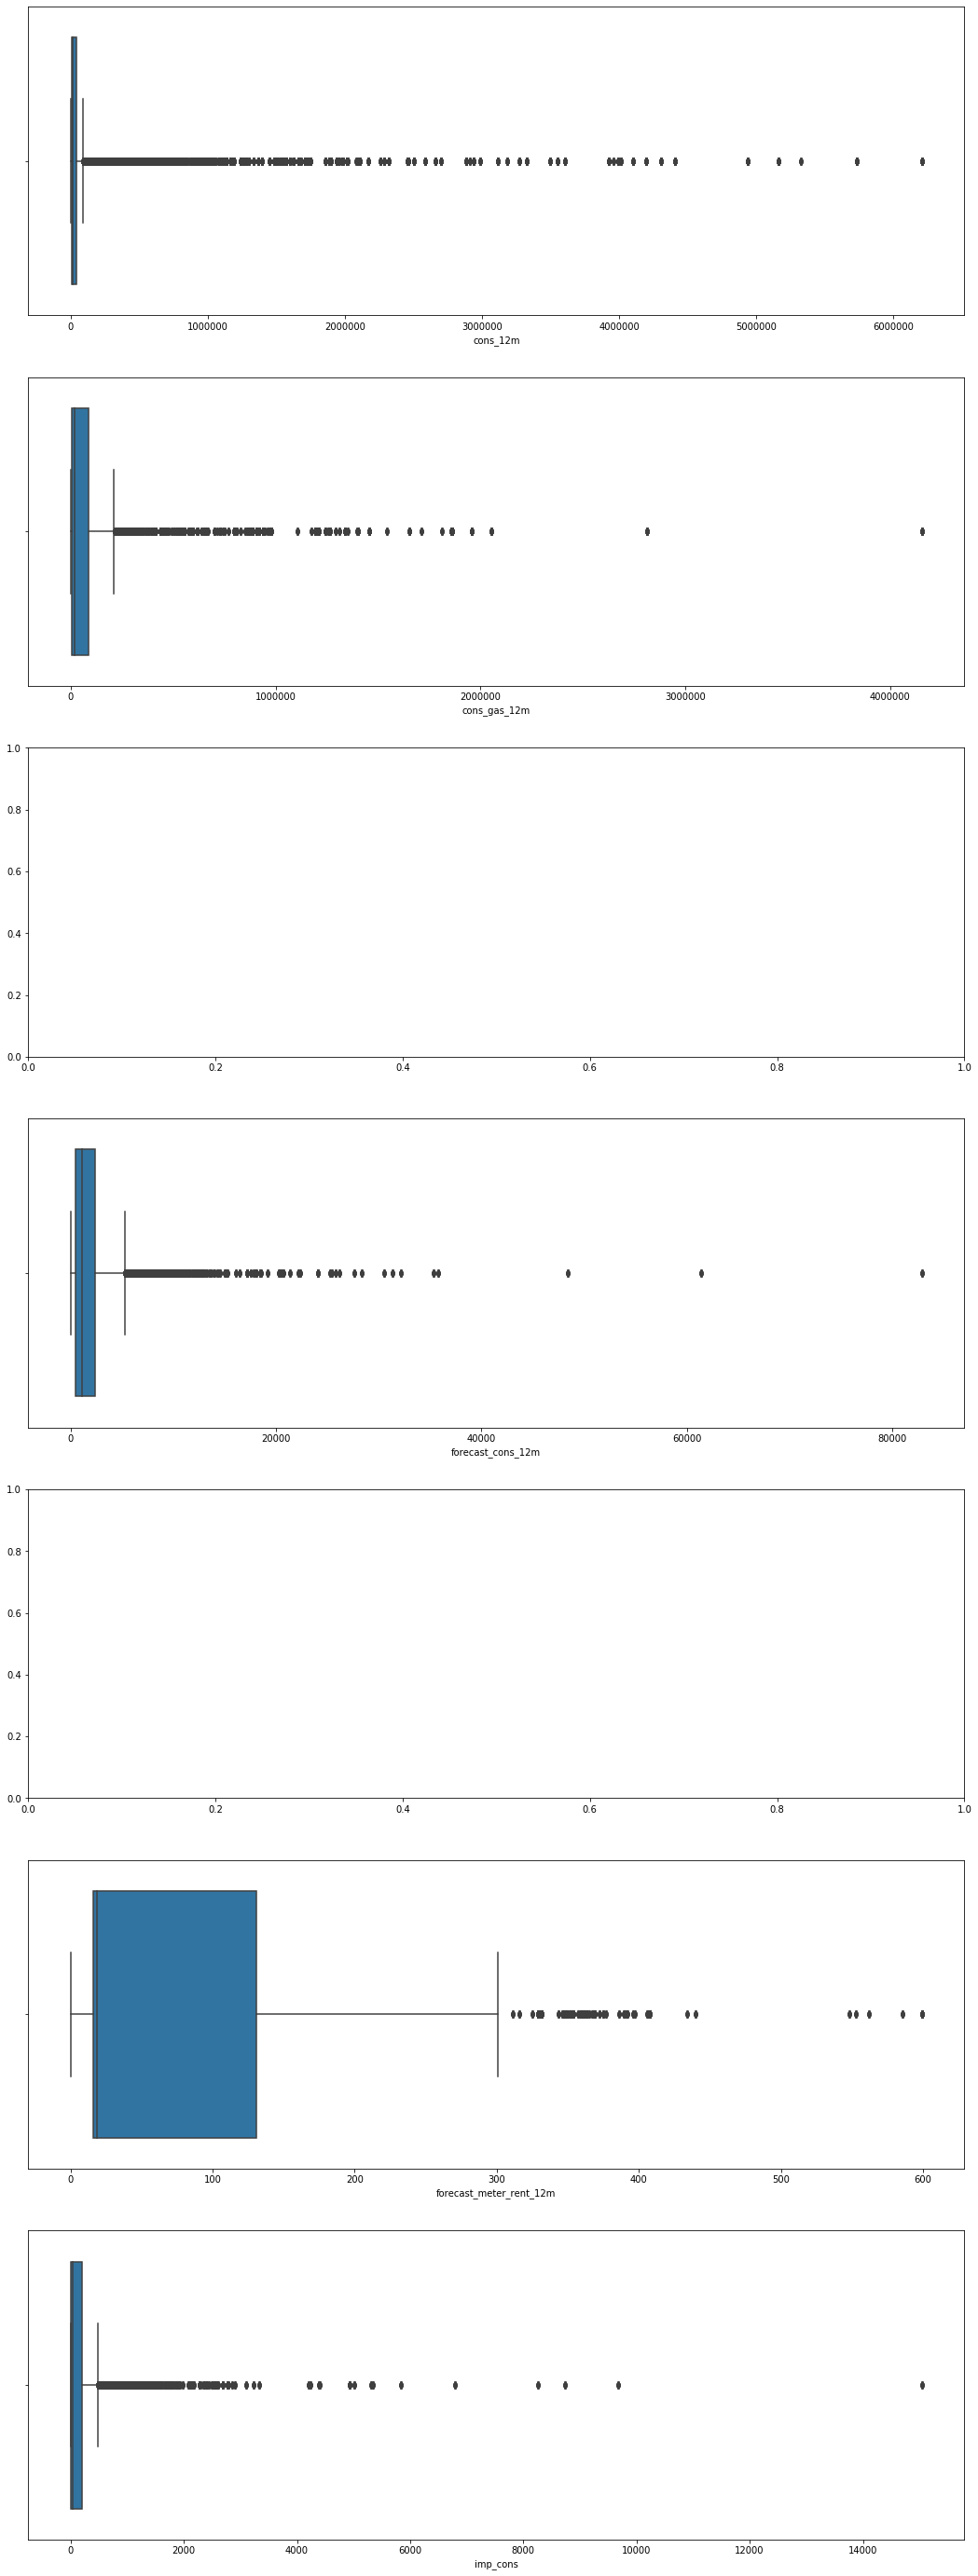

In [50]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((dataset["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((dataset[dataset["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((dataset["forecast_cons_12m"].dropna()), ax=axs[3])
sns.boxplot((dataset["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot((dataset["imp_cons"].dropna()), ax=axs[6])
plt.show()

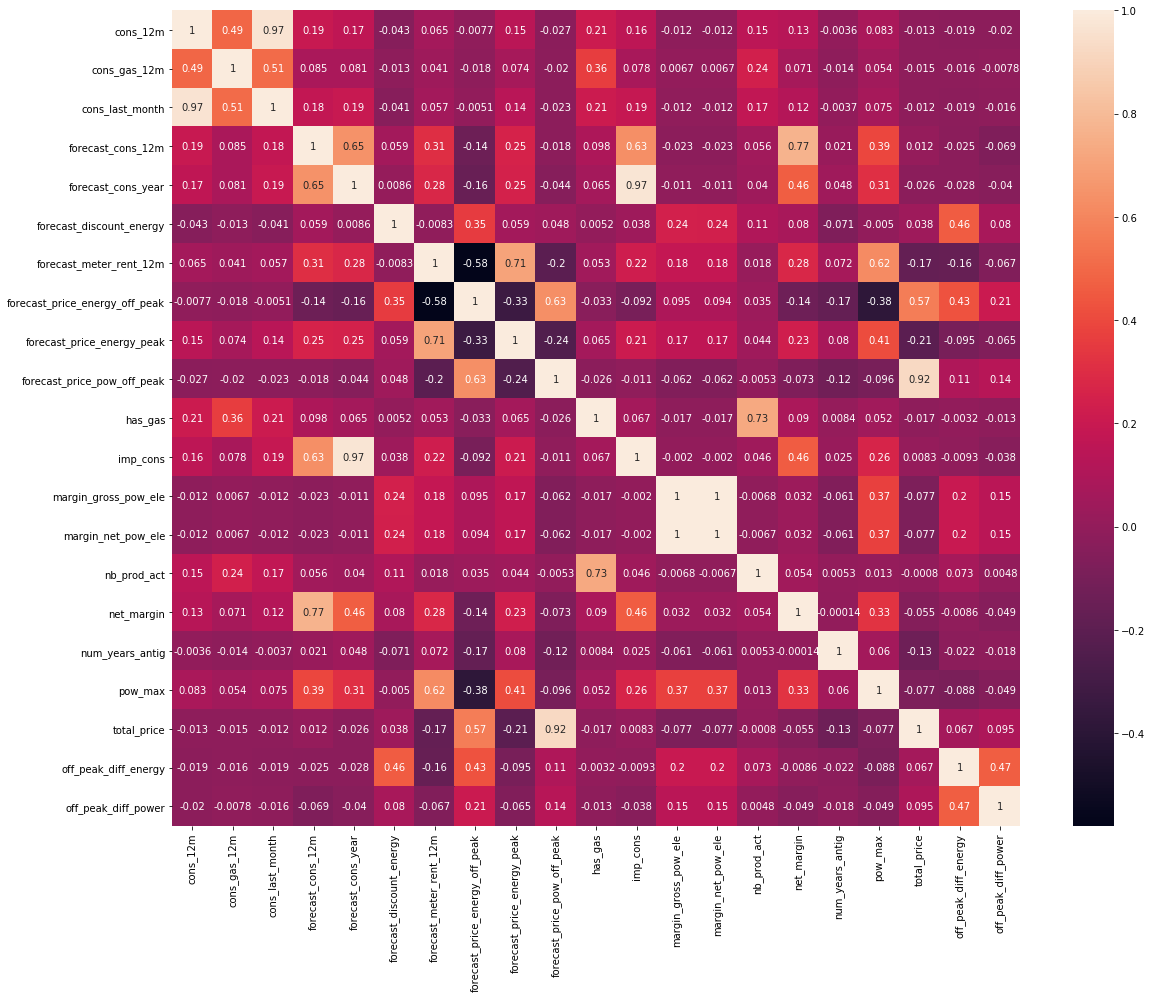

In [51]:
correlation = dataset.corr()
# Plot correlation
plt.figure(figsize=(19,15))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
 yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [52]:
dataset.drop(['forecast_cons_year','forecast_price_pow_off_peak','cons_last_month'],axis=1,inplace=True)
dataset.head()

,channel_sales,cons_12m,cons_gas_12m,date_activ,date_end,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,total_price,off_peak_diff_energy,off_peak_diff_power
0,CH1,0,54946,2013-06-15,2016-06-15,0.0,0.0,1.78,0.114481,0.098142,...,2,678.99,3,CAMP1,43.648,churned,2015-01-01,40.691945,0.020057,3.700961
1,CH1,0,54946,2013-06-15,2016-06-15,0.0,0.0,1.78,0.114481,0.098142,...,2,678.99,3,CAMP1,43.648,churned,2015-02-01,40.691945,0.020057,3.700961
2,CH1,0,54946,2013-06-15,2016-06-15,0.0,0.0,1.78,0.114481,0.098142,...,2,678.99,3,CAMP1,43.648,churned,2015-03-01,40.691949,0.020057,3.700961
3,CH1,0,54946,2013-06-15,2016-06-15,0.0,0.0,1.78,0.114481,0.098142,...,2,678.99,3,CAMP1,43.648,churned,2015-04-01,40.691949,0.020057,3.700961
4,CH1,0,54946,2013-06-15,2016-06-15,0.0,0.0,1.78,0.114481,0.098142,...,2,678.99,3,CAMP1,43.648,churned,2015-05-01,40.691949,0.020057,3.700961


In [53]:
dataset.head()

,channel_sales,cons_12m,cons_gas_12m,date_activ,date_end,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,total_price,off_peak_diff_energy,off_peak_diff_power
0,CH1,0,54946,2013-06-15,2016-06-15,0.0,0.0,1.78,0.114481,0.098142,...,2,678.99,3,CAMP1,43.648,churned,2015-01-01,40.691945,0.020057,3.700961
1,CH1,0,54946,2013-06-15,2016-06-15,0.0,0.0,1.78,0.114481,0.098142,...,2,678.99,3,CAMP1,43.648,churned,2015-02-01,40.691945,0.020057,3.700961
2,CH1,0,54946,2013-06-15,2016-06-15,0.0,0.0,1.78,0.114481,0.098142,...,2,678.99,3,CAMP1,43.648,churned,2015-03-01,40.691949,0.020057,3.700961
3,CH1,0,54946,2013-06-15,2016-06-15,0.0,0.0,1.78,0.114481,0.098142,...,2,678.99,3,CAMP1,43.648,churned,2015-04-01,40.691949,0.020057,3.700961
4,CH1,0,54946,2013-06-15,2016-06-15,0.0,0.0,1.78,0.114481,0.098142,...,2,678.99,3,CAMP1,43.648,churned,2015-05-01,40.691949,0.020057,3.700961


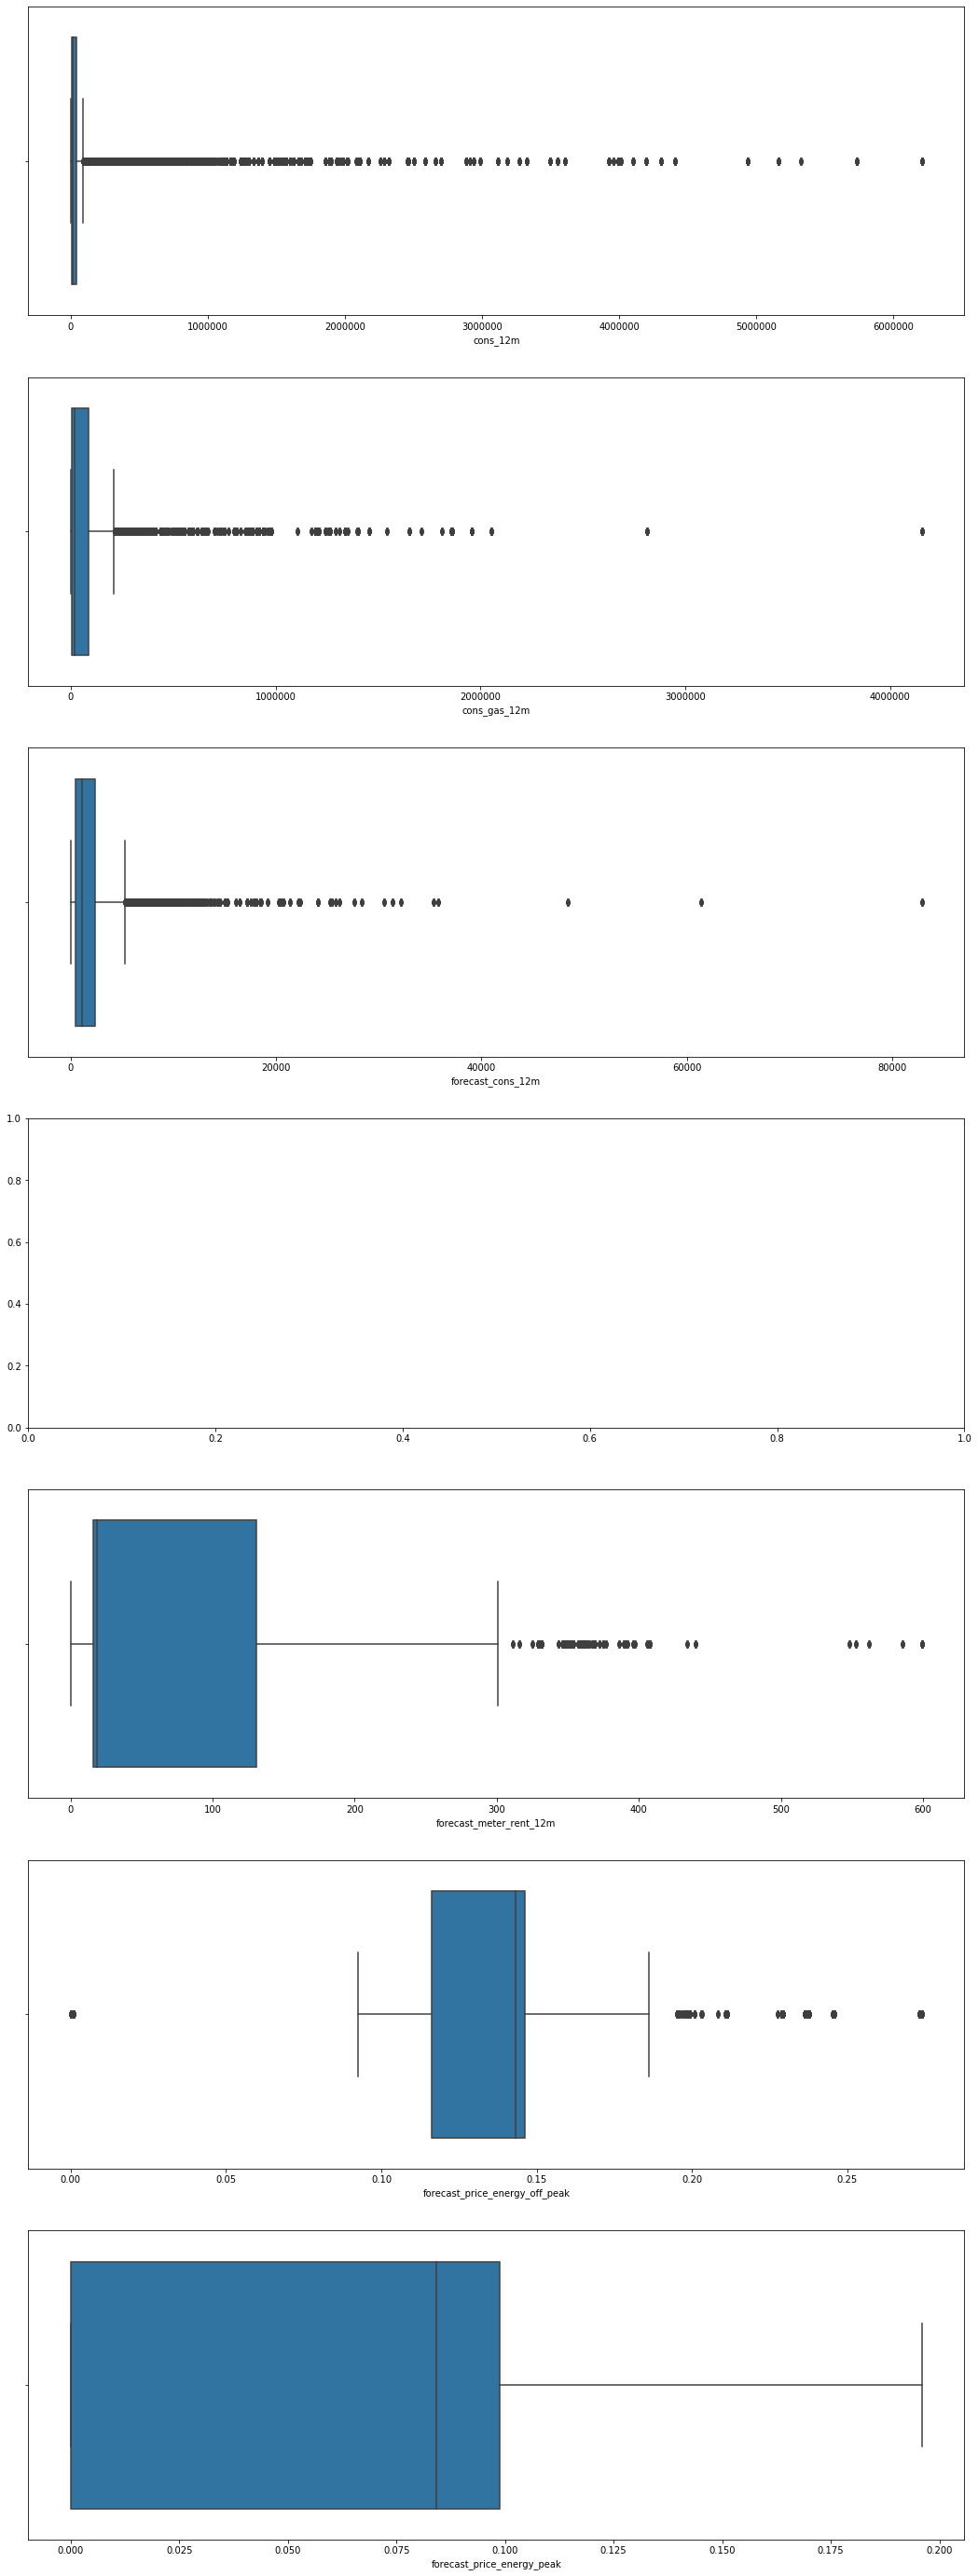

In [54]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((dataset["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((dataset[dataset["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((dataset["forecast_cons_12m"].dropna()), ax=axs[2])
#sns.boxplot((dataset["forecast_discount_energy"].dropna()), ax=axs[3])
sns.boxplot((dataset["forecast_meter_rent_12m"].dropna()), ax=axs[4])
sns.boxplot((dataset["forecast_price_energy_off_peak"].dropna()), ax=axs[5])
sns.boxplot((dataset["forecast_price_energy_peak"].dropna()), ax=axs[6])
#sns.boxplot((dataset["total_price"].dropna()), ax=axs[7])
#sns.boxplot((dataset["off_peak_diff_energy"].dropna()), ax=axs[8])
#sns.boxplot((dataset["off_peak_diff_power"].dropna()), ax=axs[9])
#sns.boxplot((dataset["imp_cons"].dropna()), ax=axs[10])
plt.show()

In [55]:
dataset["tenure"] = ((dataset["date_end"]-dataset["date_activ"])/ np.timedelta64(1, "Y")).astype(int)

In [56]:
dataset.tail()

,channel_sales,cons_12m,cons_gas_12m,date_activ,date_end,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,total_price,off_peak_diff_energy,off_peak_diff_power,tenure
175144,NAN,8730,0,2009-12-18,2016-12-17,762.41,0.0,1.07,0.167086,0.088454,...,96.34,6,CAMP3,10.392,stayed,2015-08-01,44.432892,-0.004628,-0.000001,6
175145,NAN,8730,0,2009-12-18,2016-12-17,762.41,0.0,1.07,0.167086,0.088454,...,96.34,6,CAMP3,10.392,stayed,2015-09-01,44.432892,-0.004628,-0.000001,6
175146,NAN,8730,0,2009-12-18,2016-12-17,762.41,0.0,1.07,0.167086,0.088454,...,96.34,6,CAMP3,10.392,stayed,2015-10-01,44.432892,-0.004628,-0.000001,6
175147,NAN,8730,0,2009-12-18,2016-12-17,762.41,0.0,1.07,0.167086,0.088454,...,96.34,6,CAMP3,10.392,stayed,2015-11-01,44.432892,-0.004628,-0.000001,6
175148,NAN,8730,0,2009-12-18,2016-12-17,762.41,0.0,1.07,0.167086,0.088454,...,96.34,6,CAMP3,10.392,stayed,2015-12-01,44.432892,-0.004628,-0.000001,6


In [57]:
dataset.drop(['date_activ','date_end'],axis=1,inplace=True)
dataset.head()

,channel_sales,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,has_gas,imp_cons,...,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,total_price,off_peak_diff_energy,off_peak_diff_power,tenure
0,CH1,0,54946,0.0,0.0,1.78,0.114481,0.098142,1,0.0,...,678.99,3,CAMP1,43.648,churned,2015-01-01,40.691945,0.020057,3.700961,3
1,CH1,0,54946,0.0,0.0,1.78,0.114481,0.098142,1,0.0,...,678.99,3,CAMP1,43.648,churned,2015-02-01,40.691945,0.020057,3.700961,3
2,CH1,0,54946,0.0,0.0,1.78,0.114481,0.098142,1,0.0,...,678.99,3,CAMP1,43.648,churned,2015-03-01,40.691949,0.020057,3.700961,3
3,CH1,0,54946,0.0,0.0,1.78,0.114481,0.098142,1,0.0,...,678.99,3,CAMP1,43.648,churned,2015-04-01,40.691949,0.020057,3.700961,3
4,CH1,0,54946,0.0,0.0,1.78,0.114481,0.098142,1,0.0,...,678.99,3,CAMP1,43.648,churned,2015-05-01,40.691949,0.020057,3.700961,3


In [58]:
dataset.drop(['num_years_antig'],axis=1,inplace=True)
dataset.head()

,channel_sales,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,has_gas,imp_cons,...,nb_prod_act,net_margin,origin_up,pow_max,churn,price_date,total_price,off_peak_diff_energy,off_peak_diff_power,tenure
0,CH1,0,54946,0.0,0.0,1.78,0.114481,0.098142,1,0.0,...,2,678.99,CAMP1,43.648,churned,2015-01-01,40.691945,0.020057,3.700961,3
1,CH1,0,54946,0.0,0.0,1.78,0.114481,0.098142,1,0.0,...,2,678.99,CAMP1,43.648,churned,2015-02-01,40.691945,0.020057,3.700961,3
2,CH1,0,54946,0.0,0.0,1.78,0.114481,0.098142,1,0.0,...,2,678.99,CAMP1,43.648,churned,2015-03-01,40.691949,0.020057,3.700961,3
3,CH1,0,54946,0.0,0.0,1.78,0.114481,0.098142,1,0.0,...,2,678.99,CAMP1,43.648,churned,2015-04-01,40.691949,0.020057,3.700961,3
4,CH1,0,54946,0.0,0.0,1.78,0.114481,0.098142,1,0.0,...,2,678.99,CAMP1,43.648,churned,2015-05-01,40.691949,0.020057,3.700961,3


In [59]:
dataset.drop(['forecast_discount_energy'],axis=1,inplace=True)

In [60]:
def replace_outliers_z_score(dataframe, column, Z=3):
 """
 Replace outliers with the mean values using the Z score.
 Nan values are also replaced with the mean values.
 Parameters
 ----------
 dataframe : pandas dataframe
 Contains the data where the outliers are to be found
 column : str
 Usually a string with the name of the column 
 
 Returns
 -------
 Dataframe
 With outliers under the lower and above the upper bound removed
 """
 from scipy.stats import zscore
 
 df = dataframe.copy(deep=True)
 df.dropna(inplace=True, subset=[column])
 
 # Calculate mean without outliers
 df["zscore"] = zscore(df[column])
 mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()
 
 # Replace with mean values
 dataframe[column] = dataframe[column].fillna(mean_)
 dataframe["zscore"] = zscore(dataframe[column])
 no_outliers = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape[0]
 dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_
 
 # Print message
 print("Replaced:", no_outliers, " outliers in ", column)
 return dataframe.drop(columns="zscore")

In [61]:
#for c in dataset.columns:
 #if c != "id":
     #dataset = replace_outliers_z_score(dataset,c)

In [62]:
def _find_outliers_iqr(dataframe, column):
 """
 Find outliers using the 1.5*IQR rule.
 Parameters
 ----------
 dataframe : pandas dataframe
 Contains the data where the outliers are to be found
 column : str
 Usually a string with the name of the column 
 
 Returns
 -------
 Dict
 With the values of the iqr, lower_bound and upper_bound
 """
 col = sorted(dataframe[column])
 q1, q3= np.percentile(col,[25,75])
 iqr = q3 - q1
 lower_bound = q1 -(1.5 * iqr) 
 upper_bound = q3 +(1.5 * iqr)
 results = {"iqr": iqr, "lower_bound":lower_bound, "upper_bound":upper_bound}
 return results
def remove_outliers_iqr(dataframe, column):
 """
 Remove outliers using the 1.5*IQR rule.
 Parameters
 ----------
 dataframe : pandas dataframe
 Contains the data where the outliers are to be found
 column : str
 Usually a string with the name of the column 
 
 Returns
 -------
 Dataframe
 With outliers under the lower and above the upper bound removed
 """
 
 outliers = _find_outliers_iqr(dataframe, column)
 removed = dataframe[(dataframe[column] < outliers["lower_bound"]) |
 (dataframe[column] > outliers["upper_bound"])].shape
 
 dataframe = dataframe[(dataframe[column] > outliers["lower_bound"]) &
 (dataframe[column] < outliers["upper_bound"])]
 print("Removed:", removed[0], " outliers")
 return dataframe
def remove_outliers_z_score(dataframe, column, Z=3):
 """
 Remove outliers using the Z score. Values with more than 3 are removed.
 Parameters
 ----------
 dataframe : pandas dataframe
 Contains the data where the outliers are to be found
 column : str
 Usually a string with the name of the column 
 
 Returns
 -------
 Dataframe
 With outliers under the lower and above the upper bound removed
 """
 from scipy.stats import zscore
 
 dataframe["zscore"] = zscore(dataframe[column])
 
 removed = dataframe[(dataframe["zscore"] < -Z) |
 (dataframe["zscore"] > Z)].shape
 
 dataframe = dataframe[(dataframe["zscore"] > -Z) &
 (dataframe["zscore"] < Z)]
 
 print("Removed:", removed[0], " outliers of ", column)
 
 return dataframe.drop(columns="zscore")

In [63]:
def replace_outliers_z_score(dataframe, column, Z=3):
 """
 Replace outliers with the mean values using the Z score.
 Nan values are also replaced with the mean values.
 Parameters
 ----------
 dataframe : pandas dataframe
 Contains the data where the outliers are to be found
 column : str
 Usually a string with the name of the column 
 
 Returns
 -------
 Dataframe
 With outliers under the lower and above the upper bound removed
 """
 from scipy.stats import zscore
 
 df = dataframe.copy(deep=True)
 df.dropna(inplace=True, subset=[column])
 
 # Calculate mean without outliers
 df["zscore"] = zscore(df[column])
 mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()
 
 # Replace with mean values
 no_outliers = dataframe[column].isnull().sum()
 dataframe[column] = dataframe[column].fillna(mean_)
 dataframe["zscore"] = zscore(dataframe[column])
 dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_
 
 # Print message
 print("Replaced:", no_outliers, " outliers in ", column)
 return dataframe.drop(columns="zscore")

In [64]:
dataset.columns

Index(['channel_sales', 'cons_12m', 'cons_gas_12m', 'forecast_cons_12m',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'origin_up', 'pow_max', 'churn', 'price_date',
       'total_price', 'off_peak_diff_energy', 'off_peak_diff_power', 'tenure'],
      dtype='object')

In [65]:
train = replace_outliers_z_score(dataset,"cons_12m")
train = replace_outliers_z_score(dataset,"cons_gas_12m")
#train = replace_outliers_z_score(train,"cons_last_month")
train = replace_outliers_z_score(dataset,"forecast_cons_12m")
#train = replace_outliers_z_score(train,"forecast_cons_year")
#train = replace_outliers_z_score(train,"forecast_discount_energy")
train = replace_outliers_z_score(dataset,"forecast_meter_rent_12m")
#train = replace_outliers_z_score(train,"forecast_price_energy_p1")
#train = replace_outliers_z_score(train,"forecast_price_energy_p2")
train = replace_outliers_z_score(dataset,"forecast_price_energy_peak")
train = replace_outliers_z_score(dataset,"imp_cons")
train = replace_outliers_z_score(dataset,"margin_gross_pow_ele")
train = replace_outliers_z_score(dataset,"margin_net_pow_ele")
train = replace_outliers_z_score(dataset,"net_margin")
train = replace_outliers_z_score(dataset,"pow_max")
train = replace_outliers_z_score(dataset,"nb_prod_act")
train = replace_outliers_z_score(dataset,"total_price")
train = replace_outliers_z_score(dataset,"off_peak_diff_energy")
train = replace_outliers_z_score(dataset,"off_peak_diff_power")

Replaced: 0  outliers in  cons_12m
Replaced: 0  outliers in  cons_gas_12m
Replaced: 0  outliers in  forecast_cons_12m
Replaced: 0  outliers in  forecast_meter_rent_12m
Replaced: 0  outliers in  forecast_price_energy_peak
Replaced: 0  outliers in  imp_cons
Replaced: 0  outliers in  margin_gross_pow_ele
Replaced: 0  outliers in  margin_net_pow_ele
Replaced: 0  outliers in  net_margin
Replaced: 0  outliers in  pow_max
Replaced: 0  outliers in  nb_prod_act
Replaced: 0  outliers in  total_price
Replaced: 0  outliers in  off_peak_diff_energy
Replaced: 0  outliers in  off_peak_diff_power


IndexError: index 7 is out of bounds for axis 0 with size 7

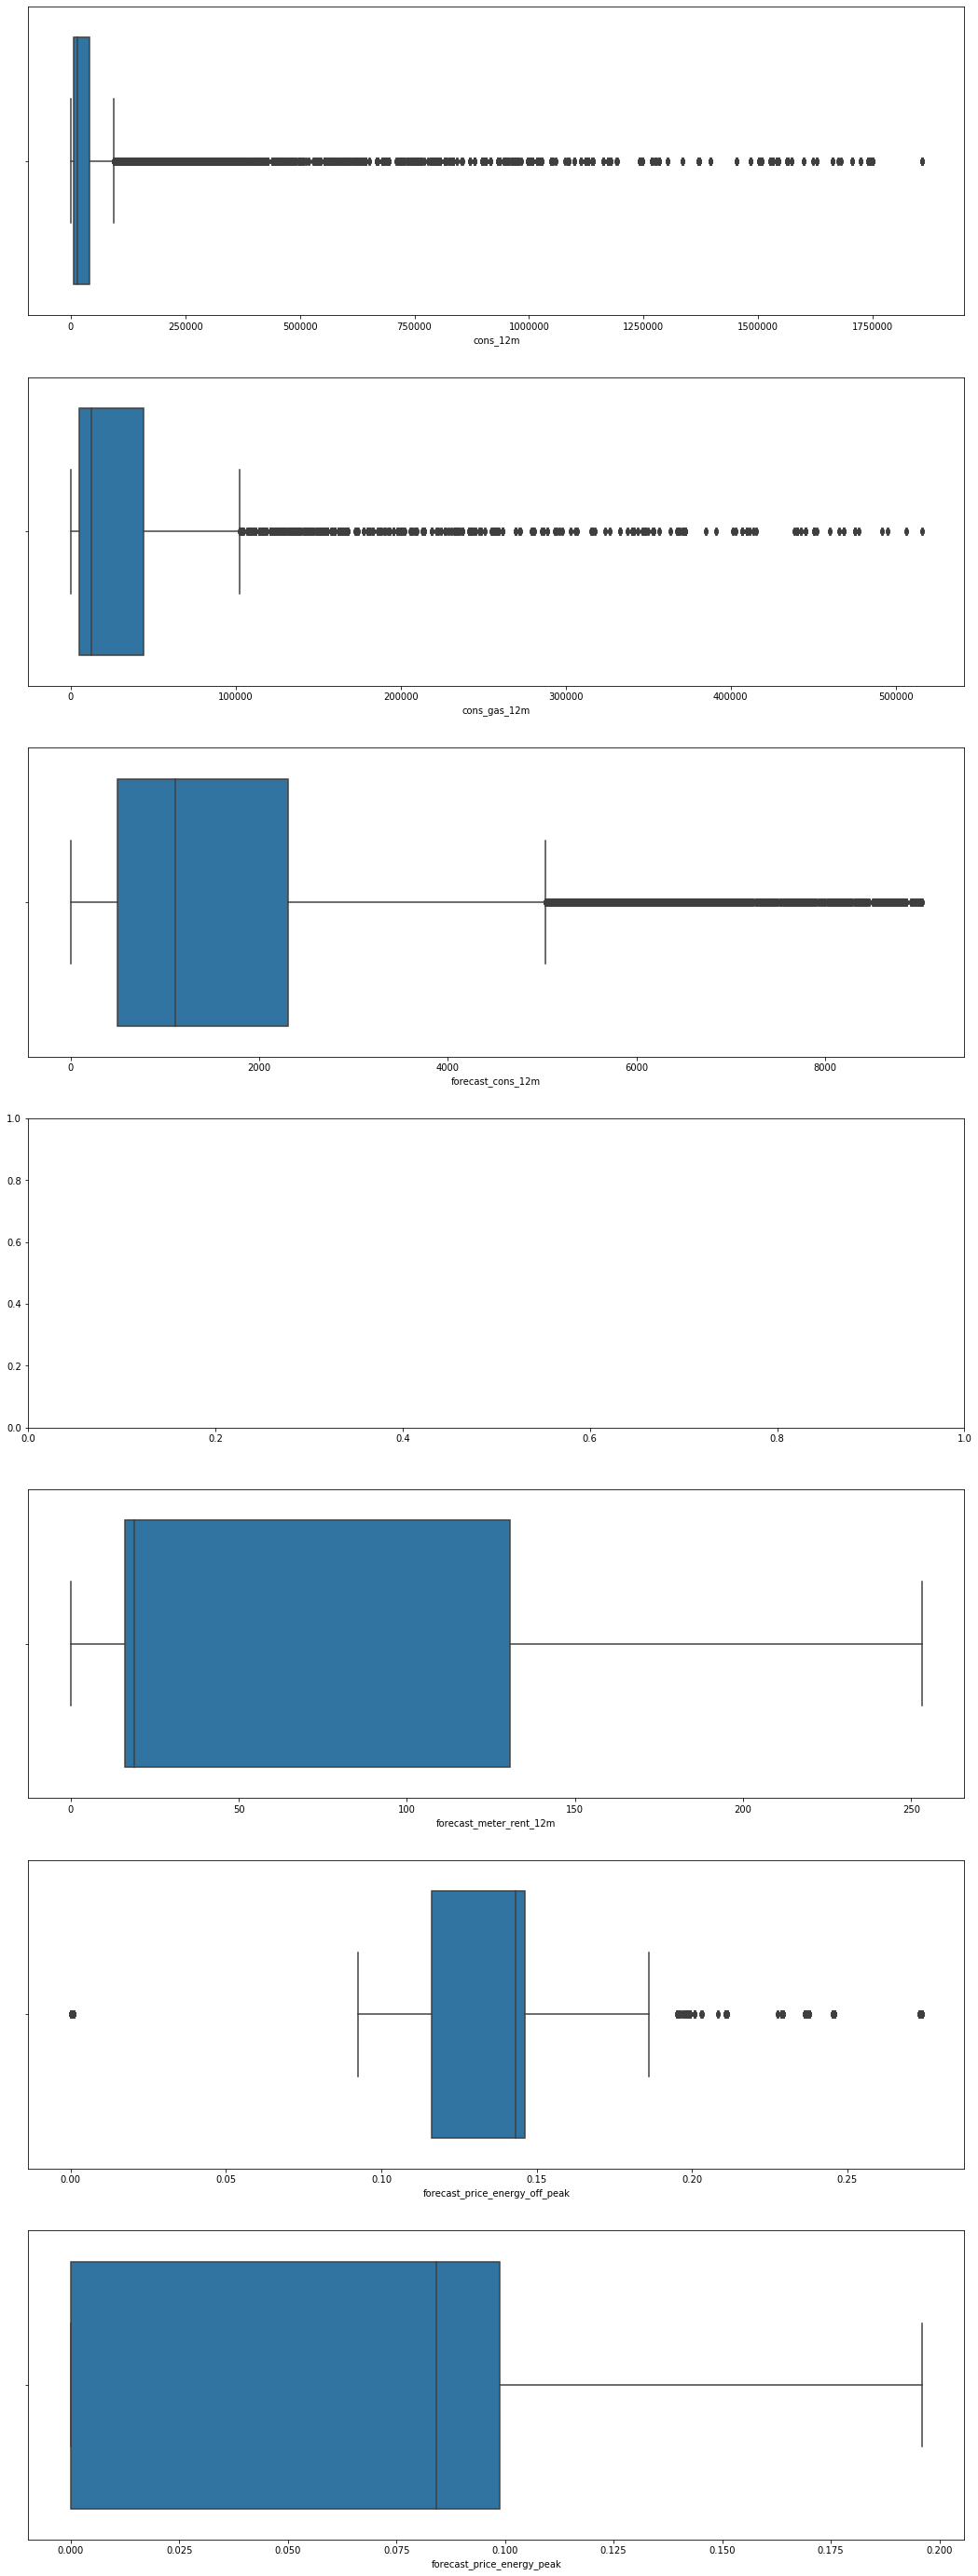

In [66]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((dataset["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((dataset[dataset["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((dataset["forecast_cons_12m"].dropna()), ax=axs[2])
sns.boxplot((dataset["forecast_meter_rent_12m"].dropna()), ax=axs[4])
sns.boxplot((dataset["forecast_price_energy_off_peak"].dropna()), ax=axs[5])
sns.boxplot((dataset["forecast_price_energy_peak"].dropna()), ax=axs[6])
sns.boxplot((dataset["total_price"].dropna()), ax=axs[7])
sns.boxplot((dataset["off_peak_diff_energy"].dropna()), ax=axs[8])
sns.boxplot((dataset["off_peak_diff_power"].dropna()), ax=axs[9])
sns.boxplot((dataset["imp_cons"].dropna()), ax=axs[10])
plt.show()

In [67]:
dataset.head()

,channel_sales,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,has_gas,imp_cons,margin_gross_pow_ele,...,net_margin,origin_up,pow_max,churn,price_date,total_price,off_peak_diff_energy,off_peak_diff_power,tenure,zscore
0,CH1,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,...,678.99,CAMP1,43.648,churned,2015-01-01,40.691945,0.020057,3.700961,3,2.537366
1,CH1,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,...,678.99,CAMP1,43.648,churned,2015-02-01,40.691945,0.020057,3.700961,3,2.537366
2,CH1,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,...,678.99,CAMP1,43.648,churned,2015-03-01,40.691949,0.020057,3.700961,3,2.537366
3,CH1,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,...,678.99,CAMP1,43.648,churned,2015-04-01,40.691949,0.020057,3.700961,3,2.537366
4,CH1,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,...,678.99,CAMP1,43.648,churned,2015-05-01,40.691949,0.020057,3.700961,3,2.537366


In [68]:
dataset.drop(['zscore'],axis=1,inplace=True)

In [69]:
dataset['churn'] = dataset['churn'].replace({'stayed':0,'churned':1})
dataset.head()

,channel_sales,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,has_gas,imp_cons,margin_gross_pow_ele,...,nb_prod_act,net_margin,origin_up,pow_max,churn,price_date,total_price,off_peak_diff_energy,off_peak_diff_power,tenure
0,CH1,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,...,2.0,678.99,CAMP1,43.648,1,2015-01-01,40.691945,0.020057,3.700961,3
1,CH1,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,...,2.0,678.99,CAMP1,43.648,1,2015-02-01,40.691945,0.020057,3.700961,3
2,CH1,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,...,2.0,678.99,CAMP1,43.648,1,2015-03-01,40.691949,0.020057,3.700961,3
3,CH1,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,...,2.0,678.99,CAMP1,43.648,1,2015-04-01,40.691949,0.020057,3.700961,3
4,CH1,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,...,2.0,678.99,CAMP1,43.648,1,2015-05-01,40.691949,0.020057,3.700961,3


In [70]:
dataset['Month']=dataset['price_date'].dt.month
dataset.head()

,channel_sales,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,has_gas,imp_cons,margin_gross_pow_ele,...,net_margin,origin_up,pow_max,churn,price_date,total_price,off_peak_diff_energy,off_peak_diff_power,tenure,Month
0,CH1,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,...,678.99,CAMP1,43.648,1,2015-01-01,40.691945,0.020057,3.700961,3,1
1,CH1,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,...,678.99,CAMP1,43.648,1,2015-02-01,40.691945,0.020057,3.700961,3,2
2,CH1,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,...,678.99,CAMP1,43.648,1,2015-03-01,40.691949,0.020057,3.700961,3,3
3,CH1,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,...,678.99,CAMP1,43.648,1,2015-04-01,40.691949,0.020057,3.700961,3,4
4,CH1,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,...,678.99,CAMP1,43.648,1,2015-05-01,40.691949,0.020057,3.700961,3,5


In [71]:
dataset.drop(['price_date'],axis=1,inplace=True)

# MODEL PREPROCESSING

In [72]:
# Making categorical variables into numeric representation - creating dummies for categorial variables

dummy_data=pd.get_dummies(dataset,columns = ['channel_sales','origin_up'],drop_first=True)
dummy_data.head()

,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,...,channel_sales_CH4,channel_sales_CH5,channel_sales_CH6,channel_sales_CH7,channel_sales_NAN,origin_up_CAMP2,origin_up_CAMP3,origin_up_CAMP4,origin_up_CAMP5,origin_up_NAN
0,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,25.44,...,0,0,0,0,0,0,0,0,0,0
1,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,25.44,...,0,0,0,0,0,0,0,0,0,0
2,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,25.44,...,0,0,0,0,0,0,0,0,0,0
3,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,25.44,...,0,0,0,0,0,0,0,0,0,0
4,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,25.44,...,0,0,0,0,0,0,0,0,0,0


# checking for corr
data_2 = data[['channel_sales','cons_12m', 'cons_gas_12m','forecast_cons_12m','forecast_discount_energy',
              'forecast_price_energy_off_peak','forecast_price_pow_off_peak','margin_net_pow_ele', 'net_margin', 'num_years_antig', 'pow_max', 'churn',
       'off_peak_diff_energy', 'off_peak_diff_power']]

# Visualize the data using seaborn Pairplots
pairplot = sns.pairplot(data_2, hue = 'churn', diag_kws={'bw': 0.2})

features = ['num_years_antig','has_gas','nb_prod_act']


for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data=data, hue = 'churn', palette="Set1")

# Making categorical variables into numeric representation - creating dummies for categorial variables

dummy_data = pd.get_dummies(data, columns = ['channel_sales','has_gas'])
dummy_data.head()

In [73]:
dummy_data.head()

,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,...,channel_sales_CH4,channel_sales_CH5,channel_sales_CH6,channel_sales_CH7,channel_sales_NAN,origin_up_CAMP2,origin_up_CAMP3,origin_up_CAMP4,origin_up_CAMP5,origin_up_NAN
0,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,25.44,...,0,0,0,0,0,0,0,0,0,0
1,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,25.44,...,0,0,0,0,0,0,0,0,0,0
2,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,25.44,...,0,0,0,0,0,0,0,0,0,0
3,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,25.44,...,0,0,0,0,0,0,0,0,0,0
4,0.0,54946.0,0.0,1.78,0.114481,0.098142,1,0.0,25.44,25.44,...,0,0,0,0,0,0,0,0,0,0


In [74]:
dummy_data.columns

Index(['cons_12m', 'cons_gas_12m', 'forecast_cons_12m',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'pow_max', 'churn', 'total_price', 'off_peak_diff_energy',
       'off_peak_diff_power', 'tenure', 'Month', 'channel_sales_CH2',
       'channel_sales_CH3', 'channel_sales_CH4', 'channel_sales_CH5',
       'channel_sales_CH6', 'channel_sales_CH7', 'channel_sales_NAN',
       'origin_up_CAMP2', 'origin_up_CAMP3', 'origin_up_CAMP4',
       'origin_up_CAMP5', 'origin_up_NAN'],
      dtype='object')

In [75]:
# Scaling our features
scaled_vars = ['cons_12m','cons_gas_12m','forecast_cons_12m','forecast_meter_rent_12m','forecast_price_energy_off_peak','net_margin','pow_max',
              'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele','total_price','off_peak_diff_energy','off_peak_diff_power']
scaler = MinMaxScaler()
dummy_data[scaled_vars] = scaler.fit_transform(dummy_data[scaled_vars])
dummy_data.head()

,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,...,channel_sales_CH4,channel_sales_CH5,channel_sales_CH6,channel_sales_CH7,channel_sales_NAN,origin_up_CAMP2,origin_up_CAMP3,origin_up_CAMP4,origin_up_CAMP5,origin_up_NAN
0,0.0,0.106486,0.0,0.007031,0.41787,0.098142,1,0.0,0.298592,0.298592,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.106486,0.0,0.007031,0.41787,0.098142,1,0.0,0.298592,0.298592,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.106486,0.0,0.007031,0.41787,0.098142,1,0.0,0.298592,0.298592,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.106486,0.0,0.007031,0.41787,0.098142,1,0.0,0.298592,0.298592,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.106486,0.0,0.007031,0.41787,0.098142,1,0.0,0.298592,0.298592,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# Input features
X = dummy_data.drop('churn', axis=1).values 
# Target variable
y = dummy_data['churn'].values 

print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

#using the Hold Out Validation technique
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

X shape: (175149, 30)
y shape: (175149,)


## DECISION TREE MODEL

In [77]:
d_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=1)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [78]:
# Calculating Feature Importance
for i, column in enumerate(dummy_data.drop('churn', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, d_tree.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [d_tree.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature cons_12m:, 0.122
Importance of feature cons_gas_12m:, 0.027
Importance of feature forecast_cons_12m:, 0.081
Importance of feature forecast_meter_rent_12m:, 0.129
Importance of feature forecast_price_energy_off_peak:, 0.069
Importance of feature forecast_price_energy_peak:, 0.025
Importance of feature has_gas:, 0.000
Importance of feature imp_cons:, 0.067
Importance of feature margin_gross_pow_ele:, 0.055
Importance of feature margin_net_pow_ele:, 0.056
Importance of feature nb_prod_act:, 0.007
Importance of feature net_margin:, 0.102
Importance of feature pow_max:, 0.055
Importance of feature total_price:, 0.006
Importance of feature off_peak_diff_energy:, 0.083
Importance of feature off_peak_diff_power:, 0.029
Importance of feature tenure:, 0.038
Importance of feature Month:, 0.000
Importance of feature channel_sales_CH2:, 0.006
Importance of feature channel_sales_CH3:, 0.009
Importance of feature channel_sales_CH4:, 0.007
Importance of feature channel_sales_CH5:

,index,Variable,Feature Importance Score
0,3,forecast_meter_rent_12m,0.128638
1,0,cons_12m,0.121792
2,11,net_margin,0.101611
3,14,off_peak_diff_energy,0.083341
4,2,forecast_cons_12m,0.081223
5,4,forecast_price_energy_off_peak,0.069327
6,7,imp_cons,0.067418
7,9,margin_net_pow_ele,0.056254
8,8,margin_gross_pow_ele,0.055405
9,12,pow_max,0.054597


In [79]:
# Accuracy on Train
print("Training Accuracy is: ", d_tree.score(X_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", d_tree.score(X_test, y_test))

Training Accuracy is:  1.0
Testing Accuracy is:  0.9998572652012561


In [80]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

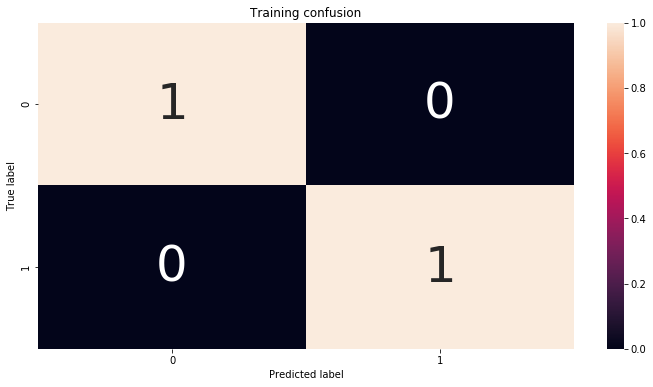

In [81]:
y_pred = d_tree.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=d_tree.classes_, title='Training confusion')

In [82]:
y_pred = d_tree.predict(X_train)
y_pred
confusion_matrix(y_train, y_pred)

array([[126569,      0],
       [     0,  13550]], dtype=int64)

## RANDOM FOREST MODEL

Training Accuracy is:  1.0
Testing Accuracy is:  1.0


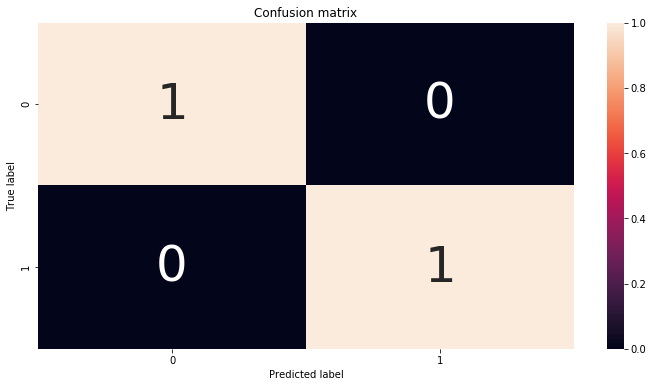

In [85]:
rf = RandomForestClassifier(n_estimators=500, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)


# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Classification accuracy on test set with max features = 1 and max_depth = None: 0.999
Classification accuracy on test set with max features = 1 and max_depth = 7: 0.901
Classification accuracy on test set with max features = 1 and max_depth = 12: 0.903
Classification accuracy on test set with max features = 1 and max_depth = 20: 0.943
Classification accuracy on test set with max features = 1 and max_depth = 25: 0.977
Classification accuracy on test set with max features = sqrt and max_depth = None: 1.000
Classification accuracy on test set with max features = sqrt and max_depth = 7: 0.902
Classification accuracy on test set with max features = sqrt and max_depth = 12: 0.916
Classification accuracy on test set with max features = sqrt and max_depth = 20: 0.989
Classification accuracy on test set with max features = sqrt and max_depth = 25: 0.999
Classification accuracy on test set with max features = log2 and max_depth = None: 1.000
Classification accuracy on test set with max features 

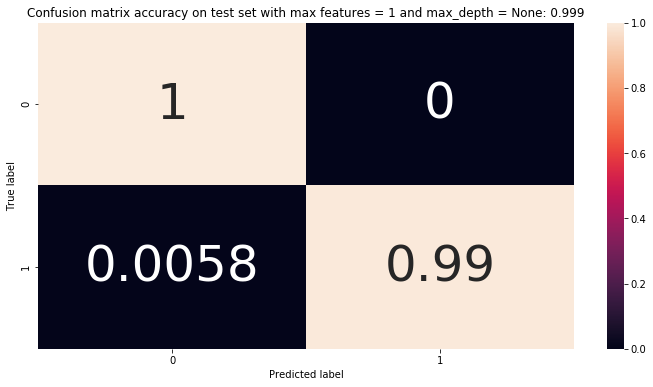

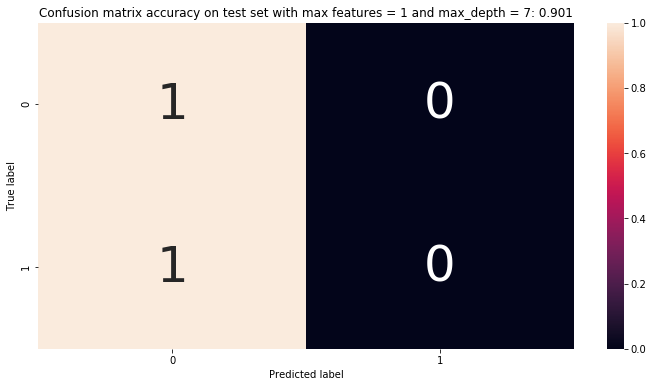

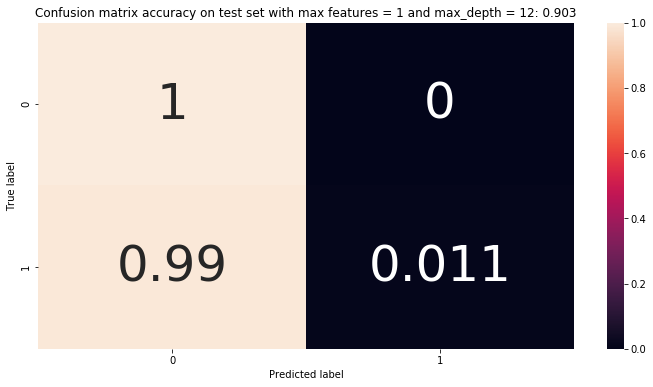

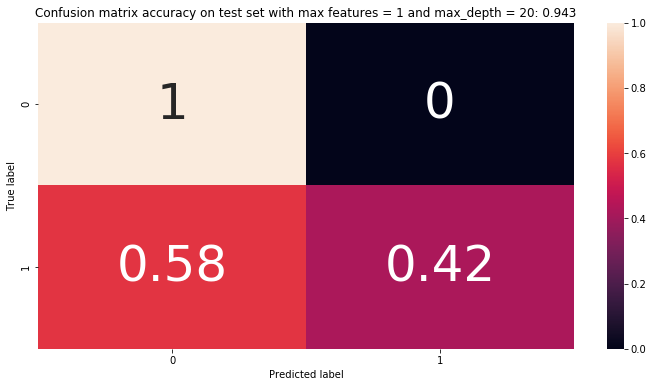

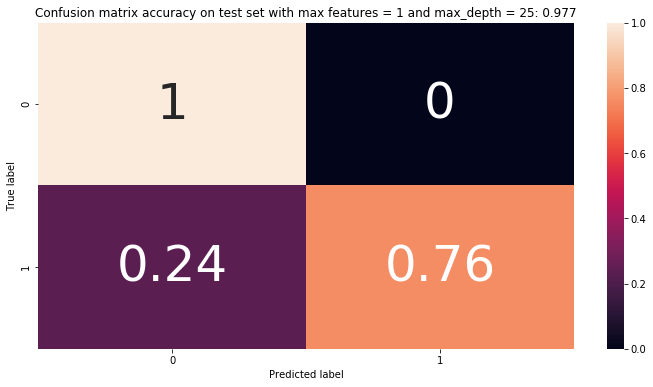

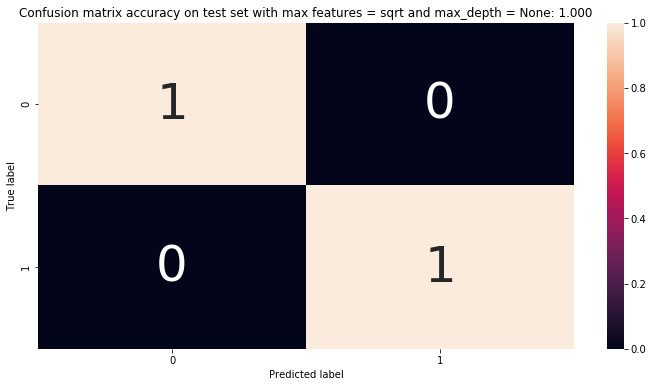

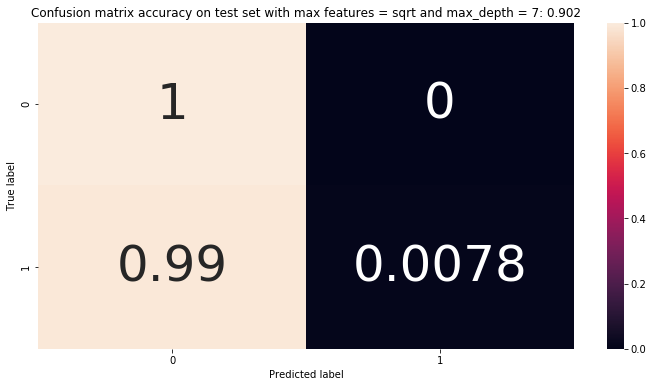

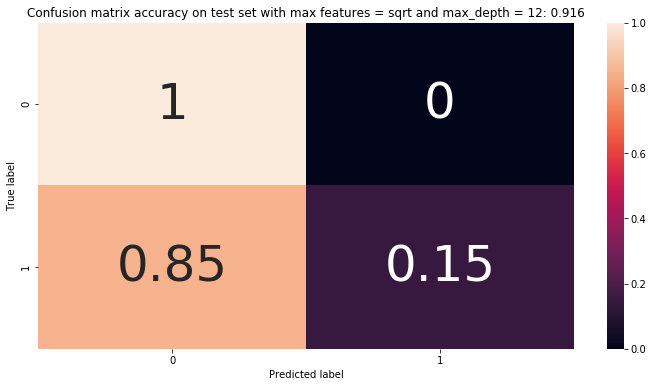

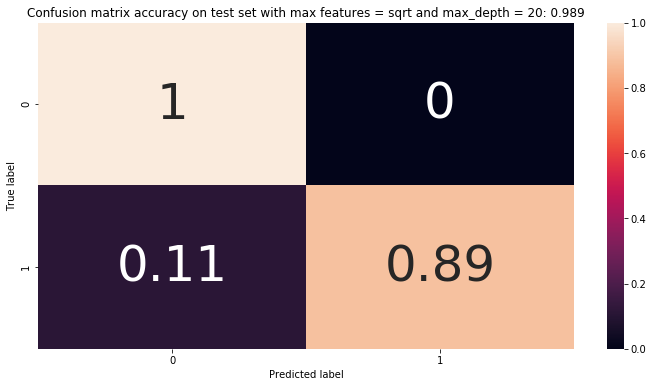

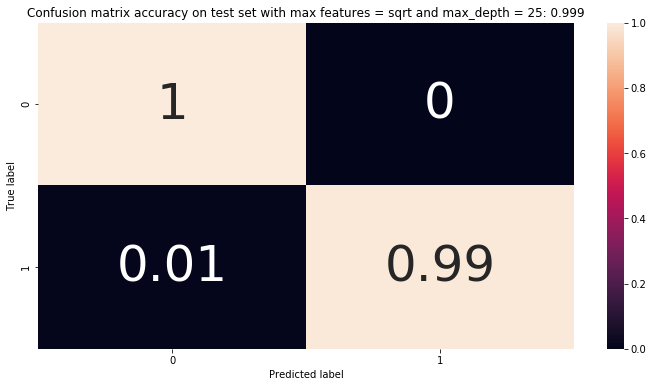

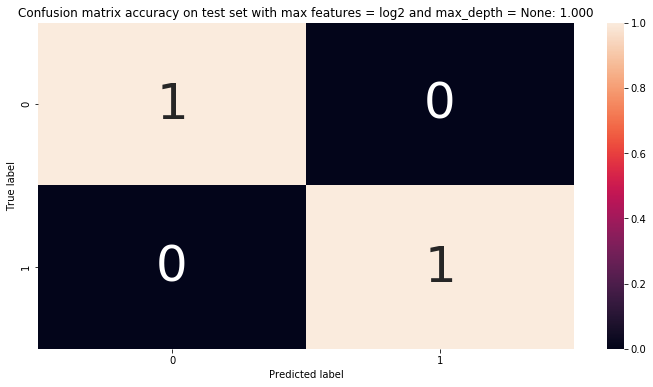

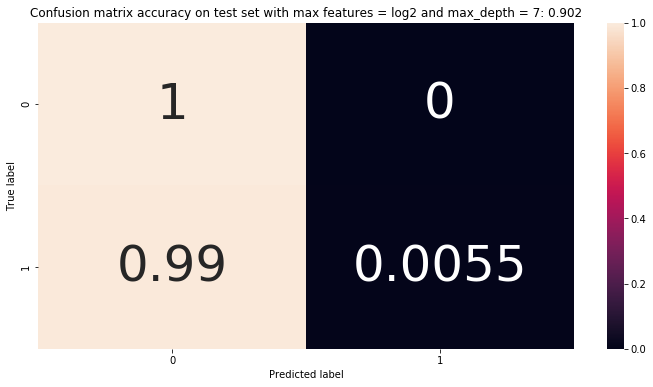

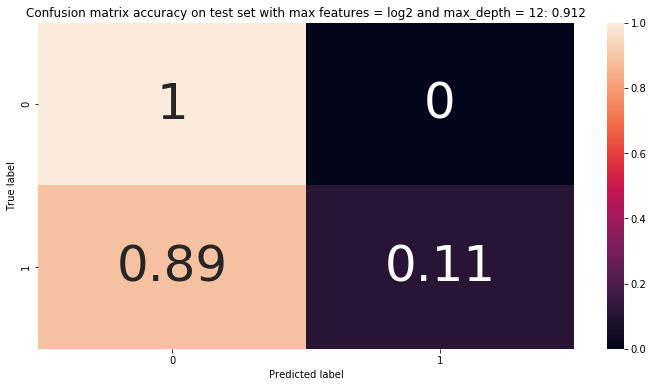

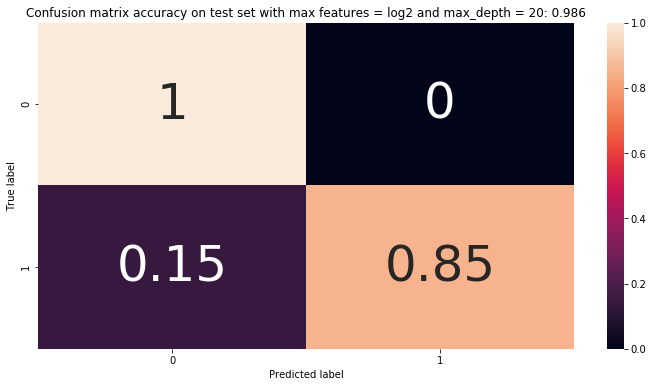

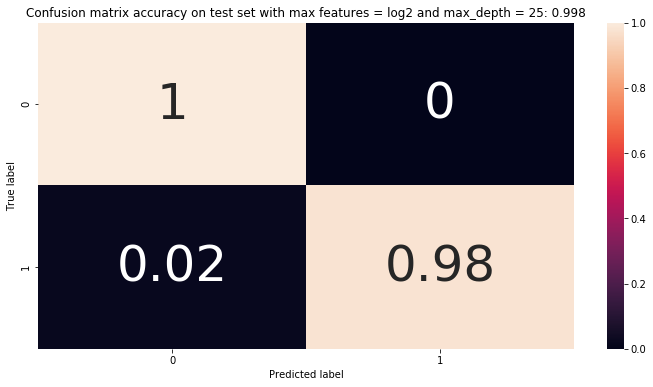

In [86]:
# Tunning Random Forest

from itertools import product
n_estimators = 200
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 7,12, 20, 25]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))

In [87]:
from sklearn.metrics import f1_score
from sklearn import metrics

In [88]:
def evaluate(model_, X_test_, y_test_):
 """
 Evaluate the accuracy, precision and recall of a model
 """
 
 # Get the model predictions
 prediction_test_ = model_.predict(X_test_)
 
 # Print the evaluation metrics as pandas dataframe
 results = pd.DataFrame({"Accuracy" : [metrics.accuracy_score(y_test_, prediction_test_)],
 "Precision" : [metrics.precision_score(y_test_, prediction_test_)],
 "Recall" : [metrics.recall_score(y_test_, prediction_test_)]})
 
 # For a more detailed report
 #print(metrics.classification_report(y_test_, prediction_test_))
 return results

In [89]:
evaluate(rf, X_test, y_test)

,Accuracy,Precision,Recall
0,0.998059,1.0,0.980307


In [90]:
def calculate_roc_auc(model_, X_test_, y_test_):
 """
 Evaluate the roc-auc score
 """
 
 # Get the model predictions
 # Note that we are using the prediction for the class 1 -> churn
 prediction_test_ = model_.predict_proba(X_test_)[:,1]
 # Compute roc-auc
 fpr, tpr, thresholds = metrics.roc_curve(y_test_, prediction_test_)
 
 # Print the evaluation metrics as pandas dataframe
 score = pd.DataFrame({"ROC-AUC" : [metrics.auc(fpr, tpr)]})
 return fpr, tpr, score
def plot_roc_auc(fpr,tpr):
 """
 Plot the Receiver Operating Characteristic from a list
 of true positive rates and false positive rates.
 """
 
 # Initialize plot
 f, ax = plt.subplots(figsize=(14,8))
 
 # Plot ROC
 roc_auc = metrics.auc(fpr, tpr)
 ax.plot(fpr, tpr, lw=2, alpha=0.3,
 label="AUC = %0.2f" % (roc_auc))
 # Plot the random line.
 plt.plot([0, 1], [0, 1], linestyle='--', lw=3, color='r',
 label="Random", alpha=.8)
 
 # Fine tune and show the plot.
 ax.set_xlim([-0.05, 1.05])
 ax.set_ylim([-0.05, 1.05])
 ax.set_xlabel("False Positive Rate (FPR)")
 ax.set_ylabel("True Positive Rate (TPR)")
 ax.set_title("ROC-AUC")
 ax.legend(loc="lower right")
 plt.show()

In [91]:
fpr, tpr, auc_score = calculate_roc_auc(rf, X_test, y_test)

In [92]:
auc_score

,ROC-AUC
0,1.0


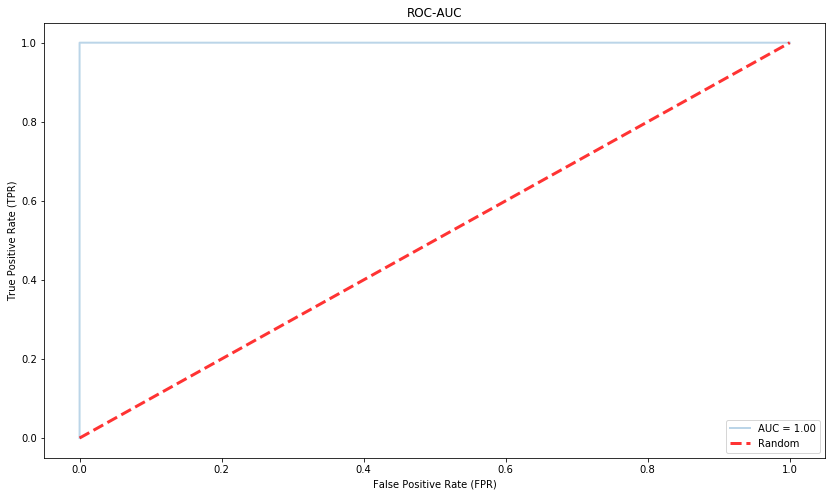

In [93]:
plot_roc_auc(fpr, tpr)
plt.show()

In [94]:
def plot_roc_curve(fprs, tprs):
 """
 Plot the Receiver Operating Characteristic from a list
 of true positive rates and false positive rates.
 """
 
 # Initialize useful lists + the plot axes.
 tprs_interp = []
 aucs = []
 mean_fpr = np.linspace(0, 1, 100)
 f, ax = plt.subplots(figsize=(18,10))
 
 # Plot ROC for each K-Fold + compute AUC scores.
 for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
     tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
     tprs_interp[-1][0] = 0.0
 roc_auc = metrics.auc(fpr, tpr)
 aucs.append(roc_auc)
 ax.plot(fpr, tpr, lw=2, alpha=0.3,
 label="ROC fold %d (AUC = %0.2f)" % (i, roc_auc))
 
 # Plot the luck line.
 plt.plot([0, 1], [0, 1], linestyle='--', lw=3, color='r',
 label="Random", alpha=.8)
 
 # Plot the mean ROC.
 mean_tpr = np.mean(tprs_interp, axis=0)
 mean_tpr[-1] = 1.0
 mean_auc = metrics.auc(mean_fpr, mean_tpr)
 std_auc = np.std(aucs)
 ax.plot(mean_fpr, mean_tpr, color='b',
 label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
 lw=4, alpha=.8)
 
 # Plot the standard deviation around the mean ROC.
 std_tpr = np.std(tprs_interp, axis=0)
 tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
 tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
 ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color="grey", alpha=.2,
 label=r"$\pm$ 1 std. dev.")
 
 # Fine tune and show the plot.
 ax.set_xlim([-0.05, 1.05])
 ax.set_ylim([-0.05, 1.05])
 ax.set_xlabel("False Positive Rate (FPR)")
 ax.set_ylabel("True Positive Rate (TPR)")
 ax.set_title("ROC-AUC")
 ax.legend(loc="lower right")
 plt.show()
 return (f, ax)
def compute_roc_auc(model_, index):
 y_predict = model_.predict_proba(X.iloc[index])[:,1]
 fpr, tpr, thresholds = metrics.roc_curve(y.iloc[index], y_predict)
 auc_score = metrics.auc(fpr, tpr)
 return fpr, tpr, auc_score
#cv = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)

In [ ]:
#from sklearn.model_selection import StratifiedKFold
#cv = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
#fprs, tprs, scores = [], [], []

In [95]:
# Choosing parameters for model after hyper tunning
rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features='log2', 
                                max_depth=20, 
                                n_jobs=2,
                                random_state=1337)

Training Accuracy is:  0.9873821537407489
Testing Accuracy is:  0.9855266914073652


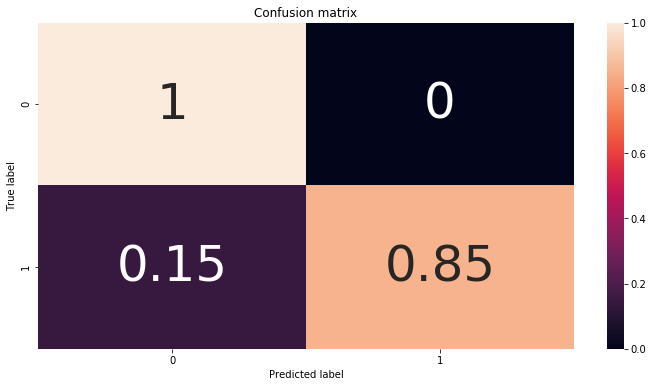

In [96]:
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)


# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

In [97]:
evaluate(rf, X_test, y_test)

,Accuracy,Precision,Recall
0,0.985527,1.0,0.853171


# Now testing model on 20% discount in price

In [98]:
new_data = dummy_data.copy()
new_data.head()

,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,...,channel_sales_CH4,channel_sales_CH5,channel_sales_CH6,channel_sales_CH7,channel_sales_NAN,origin_up_CAMP2,origin_up_CAMP3,origin_up_CAMP4,origin_up_CAMP5,origin_up_NAN
0,0.0,0.106486,0.0,0.007031,0.41787,0.098142,1,0.0,0.298592,0.298592,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.106486,0.0,0.007031,0.41787,0.098142,1,0.0,0.298592,0.298592,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.106486,0.0,0.007031,0.41787,0.098142,1,0.0,0.298592,0.298592,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.106486,0.0,0.007031,0.41787,0.098142,1,0.0,0.298592,0.298592,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.106486,0.0,0.007031,0.41787,0.098142,1,0.0,0.298592,0.298592,...,0,0,0,0,0,0,0,0,0,0


In [99]:
new_data.columns

Index(['cons_12m', 'cons_gas_12m', 'forecast_cons_12m',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'pow_max', 'churn', 'total_price', 'off_peak_diff_energy',
       'off_peak_diff_power', 'tenure', 'Month', 'channel_sales_CH2',
       'channel_sales_CH3', 'channel_sales_CH4', 'channel_sales_CH5',
       'channel_sales_CH6', 'channel_sales_CH7', 'channel_sales_NAN',
       'origin_up_CAMP2', 'origin_up_CAMP3', 'origin_up_CAMP4',
       'origin_up_CAMP5', 'origin_up_NAN'],
      dtype='object')

In [100]:
new_data['total_price']=new_data['total_price']*0.8

In [101]:
new_data['total_price']

0         0.136195
1         0.136195
2         0.136195
3         0.136195
4         0.136195
            ...   
175144    0.327133
175145    0.327133
175146    0.327133
175147    0.327133
175148    0.327133
Name: total_price, Length: 175149, dtype: float64

In [102]:
new_data.columns

Index(['cons_12m', 'cons_gas_12m', 'forecast_cons_12m',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'pow_max', 'churn', 'total_price', 'off_peak_diff_energy',
       'off_peak_diff_power', 'tenure', 'Month', 'channel_sales_CH2',
       'channel_sales_CH3', 'channel_sales_CH4', 'channel_sales_CH5',
       'channel_sales_CH6', 'channel_sales_CH7', 'channel_sales_NAN',
       'origin_up_CAMP2', 'origin_up_CAMP3', 'origin_up_CAMP4',
       'origin_up_CAMP5', 'origin_up_NAN'],
      dtype='object')

In [103]:
new_data = new_data.drop(['churn'],axis=1)
new_data.head()

,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,...,channel_sales_CH4,channel_sales_CH5,channel_sales_CH6,channel_sales_CH7,channel_sales_NAN,origin_up_CAMP2,origin_up_CAMP3,origin_up_CAMP4,origin_up_CAMP5,origin_up_NAN
0,0.0,0.106486,0.0,0.007031,0.41787,0.098142,1,0.0,0.298592,0.298592,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.106486,0.0,0.007031,0.41787,0.098142,1,0.0,0.298592,0.298592,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.106486,0.0,0.007031,0.41787,0.098142,1,0.0,0.298592,0.298592,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.106486,0.0,0.007031,0.41787,0.098142,1,0.0,0.298592,0.298592,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.106486,0.0,0.007031,0.41787,0.098142,1,0.0,0.298592,0.298592,...,0,0,0,0,0,0,0,0,0,0


In [104]:
pred_value = rf.predict(new_data.values)

In [105]:
pred_value

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [106]:
pred_value_prob = rf.predict_proba(new_data.values)
pred_value_prob

array([[0.02601923, 0.97398077],
       [0.02601923, 0.97398077],
       [0.02601923, 0.97398077],
       ...,
       [0.95794919, 0.04205081],
       [0.95794919, 0.04205081],
       [0.95794919, 0.04205081]])

In [107]:
# function to select second column for probabilities

def column(matrix, i):
    return [row[i] for row in matrix]

column(pred_value_prob, 1)

[0.9739807692307693,
 0.9739807692307693,
 0.9739807692307693,
 0.974760101010101,
 0.984760101010101,
 0.984760101010101,
 0.984760101010101,
 0.984760101010101,
 0.984760101010101,
 0.984760101010101,
 0.984760101010101,
 0.965,
 0.06140104492237628,
 0.05570997714037655,
 0.05546198400880324,
 0.05546198400880324,
 0.05624496956481706,
 0.05624496956481706,
 0.05624496956481706,
 0.0560810860668327,
 0.05620914190085493,
 0.05620914190085493,
 0.05686952750197329,
 0.056534155536737137,
 0.053299709658309755,
 0.053299709658309755,
 0.05446554206507476,
 0.05445988607280804,
 0.05445988607280804,
 0.05445988607280804,
 0.05445988607280804,
 0.05445988607280804,
 0.05438888245536058,
 0.0549699529000674,
 0.053759426584277924,
 0.053759426584277924,
 0.05469329364171967,
 0.05481733873177098,
 0.05486703473759765,
 0.05434050610608682,
 0.05862696443942014,
 0.05862696443942014,
 0.05862696443942014,
 0.053626964439420145,
 0.05392816925869726,
 0.058009239703404075,
 0.0579834665075

In [108]:
# Joining the raw data with the predictions

pred_data = new_data.copy()
pred_data['Predictions - Churn or Not'] = pred_value
pred_data['Predictions - Probability to Churn'] = column(pred_value_prob, 1)
pred_data['Predictions - Churn or Not Desc'] = 'Empty'
pred_data['Predictions - Churn or Not Desc'][pred_data['Predictions - Churn or Not'] == 0] = 'Retention'
pred_data['Predictions - Churn or Not Desc'][pred_data['Predictions - Churn or Not'] == 1] = 'Churn'
pred_data.head()

C:\Users\VICTOR ONYEAGHALA\anaconda3.0\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\VICTOR ONYEAGHALA\anaconda3.0\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,...,channel_sales_CH7,channel_sales_NAN,origin_up_CAMP2,origin_up_CAMP3,origin_up_CAMP4,origin_up_CAMP5,origin_up_NAN,Predictions - Churn or Not,Predictions - Probability to Churn,Predictions - Churn or Not Desc
0,0.0,0.106486,0.0,0.007031,0.41787,0.098142,1,0.0,0.298592,0.298592,...,0,0,0,0,0,0,0,1,0.973981,Churn
1,0.0,0.106486,0.0,0.007031,0.41787,0.098142,1,0.0,0.298592,0.298592,...,0,0,0,0,0,0,0,1,0.973981,Churn
2,0.0,0.106486,0.0,0.007031,0.41787,0.098142,1,0.0,0.298592,0.298592,...,0,0,0,0,0,0,0,1,0.973981,Churn
3,0.0,0.106486,0.0,0.007031,0.41787,0.098142,1,0.0,0.298592,0.298592,...,0,0,0,0,0,0,0,1,0.974760,Churn
4,0.0,0.106486,0.0,0.007031,0.41787,0.098142,1,0.0,0.298592,0.298592,...,0,0,0,0,0,0,0,1,0.984760,Churn


In [124]:
new_data_2 = data_merge.copy()
new_data_2.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,total_price
0,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,25.44,25.44,2,678.99,3,CAMP1,43.648,churned,2015-01-01,40.691945
1,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,25.44,25.44,2,678.99,3,CAMP1,43.648,churned,2015-02-01,40.691945
2,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,25.44,25.44,2,678.99,3,CAMP1,43.648,churned,2015-03-01,40.691949
3,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,25.44,25.44,2,678.99,3,CAMP1,43.648,churned,2015-04-01,40.691949
4,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,25.44,25.44,2,678.99,3,CAMP1,43.648,churned,2015-05-01,40.691949


In [128]:
new_data_3 = new_data_2[['channel_sales', 'cons_12m', 'cons_gas_12m', 'forecast_cons_12m',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'origin_up', 'pow_max', 'churn', 'total_price',
       'num_years_antig']]

In [129]:
# dummy variables
new_data_3 = pd.get_dummies(new_data_2, columns = ['channel_sales','origin_up'], drop_first = True)
new_data_3.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,channel_sales_CH4,channel_sales_CH5,channel_sales_CH6,channel_sales_CH7,channel_sales_NAN,origin_up_CAMP2,origin_up_CAMP3,origin_up_CAMP4,origin_up_CAMP5,origin_up_NAN
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
new_data['total_price']=new_data['total_price']*0.8

In [131]:
#scaling
scale_vars = ['cons_12m','cons_gas_12m','forecast_cons_12m','forecast_meter_rent_12m','forecast_price_energy_off_peak','net_margin','pow_max',
              'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele','total_price']
new_data_3[scale_vars] = scaler.fit_transform(new_data_2[scale_vars])


new_data_3.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,channel_sales_CH4,channel_sales_CH5,channel_sales_CH6,channel_sales_CH7,channel_sales_NAN,origin_up_CAMP2,origin_up_CAMP3,origin_up_CAMP4,origin_up_CAMP5,origin_up_NAN
0,24011ae4ebbe3035111d65fa7c15bc57,0.0,0.013225,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,24011ae4ebbe3035111d65fa7c15bc57,0.0,0.013225,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,24011ae4ebbe3035111d65fa7c15bc57,0.0,0.013225,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,24011ae4ebbe3035111d65fa7c15bc57,0.0,0.013225,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,24011ae4ebbe3035111d65fa7c15bc57,0.0,0.013225,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
new_data_3 = new_data_3.drop(['date_activ','date_end','date_modif_prod','date_renewal','price_date'],axis=1)#'churn','id'

In [139]:
new_data_3.columns

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'total_price',
       'channel_sales_CH2', 'channel_sales_CH3', 'channel_sales_CH4',
       'channel_sales_CH5', 'channel_sales_CH6', 'channel_sales_CH7',
       'channel_sales_NAN', 'origin_up_CAMP2', 'origin_up_CAMP3',
       'origin_up_CAMP4', 'origin_up_CAMP5', 'origin_up_NAN'],
      dtype='object')

In [140]:
new_data_3=new_data_3.drop(['forecast_discount_energy'],axis=1)

In [141]:
pred_value = rf.predict(new_data_3.values)

In [142]:
pred_value

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [143]:
pred_value_prob = rf.predict_proba(new_data_3.values)
pred_value_prob

array([[0.75598668, 0.24401332],
       [0.75598668, 0.24401332],
       [0.75598668, 0.24401332],
       ...,
       [0.7575    , 0.2425    ],
       [0.7575    , 0.2425    ],
       [0.7575    , 0.2425    ]])

In [144]:
# function to select second column for probabilities

def column(matrix, i):
    return [row[i] for row in matrix]

column(pred_value_prob, 1)

[0.24401332313005258,
 0.24401332313005258,
 0.24401332313005258,
 0.24401332313005258,
 0.24401332313005258,
 0.24401332313005258,
 0.24401332313005258,
 0.24401332313005258,
 0.24401332313005258,
 0.24401332313005258,
 0.24401332313005258,
 0.24401332313005258,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.3275,
 0.3275,
 0.3275,
 0.3275,
 0.3275,
 0.3275,
 0.3275,
 0.3275,
 0.3275,
 0.3275,
 0.3275,
 0.3275,
 0.255,
 0.255,
 0.255,
 0.255,
 0.255,
 0.255,
 0.255,
 0.255,
 0.255,
 0.255,
 0.255,
 0.255,
 0.39,
 0.39,
 0.39,
 0.39,
 0.39,
 0.39,
 0.39,
 0.39,
 0.39,
 0.39,
 0.39,
 0.39,
 0.42393364744913264,
 0.42393364744913264,
 0.42393364744913264,
 0.42393364744913264,
 0.42393364744913264,
 0.42393364744913264,
 0.42393364744913264,
 0.42393364744913264,
 0.42393364744913264,
 0.42393364744913264,
 0.42393364744913264,
 0.42393364744913264,
 0.24041780023319084,
 0.24041780023319084,
 0.24041780023319084,
 0.24041780023319084,
 0.240417800

In [145]:
# Joining the raw data with the predictions

pred_data = new_data_2.copy()
pred_data['Predictions - Churn or Not'] = pred_value
pred_data['Predictions - Probability to Churn'] = column(pred_value_prob, 1)
pred_data['Predictions - Churn or Not Desc'] = 'Empty'
pred_data['Predictions - Churn or Not Desc'][pred_data['Predictions - Churn or Not'] == 0] = 'Retention'
pred_data['Predictions - Churn or Not Desc'][pred_data['Predictions - Churn or Not'] == 1] = 'Churn'
pred_data.head()

C:\Users\VICTOR ONYEAGHALA\anaconda3.0\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\VICTOR ONYEAGHALA\anaconda3.0\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,total_price,Predictions - Churn or Not,Predictions - Probability to Churn,Predictions - Churn or Not Desc
0,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,678.99,3,CAMP1,43.648,churned,2015-01-01,40.691945,0,0.244013,Retention
1,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,678.99,3,CAMP1,43.648,churned,2015-02-01,40.691945,0,0.244013,Retention
2,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,678.99,3,CAMP1,43.648,churned,2015-03-01,40.691949,0,0.244013,Retention
3,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,678.99,3,CAMP1,43.648,churned,2015-04-01,40.691949,0,0.244013,Retention
4,24011ae4ebbe3035111d65fa7c15bc57,CH1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,678.99,3,CAMP1,43.648,churned,2015-05-01,40.691949,0,0.244013,Retention
